In [ ]:
import pandas as pd

In [ ]:
song_df_1 = pd.read_csv('/content/drive/MyDrive/SML/song_data/triplets_file.csv')
song_df_1.head()


,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
song_df_2 = pd.read_csv('/content/drive/MyDrive/SML/song_data/song_data.csv')
song_df_2.head()


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
song_listen_df = pd.merge(listen_df, song_df[['song_id', 'title']], on='song_id')

# Create a pivot table of user-song listen counts
pivot_table = pd.pivot_table(song_listen_df, values='listen_count', index='user_id', columns='title', fill_value=0)

# Extract the pivot table into a matrix
song_matrix = pivot_table.values


NameError: ignored

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=50, init='random', random_state=0)
W = nmf_model.fit_transform(song_matrix)
H = nmf_model.components_


In [ ]:
song_index = pivot_table.columns.values

# Recommend 5 songs for each user
for user_id in listen_df['user_id'].unique():
    # Get the user's song listen counts
    user_songs = pivot_table.loc[user_id, :]
    # Make song recommendations for the user based on the NMF model
    recommended_songs = pd.Series(H.dot(user_songs).argsort()[::-1])
    # Print the top 5 recommended songs for the user
    print(f"User {user_id} recommendations: {', '.join(song_index[recommended_songs][:5])}")

In [ ]:
# combine both data
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
song_user = song_df.groupby('song_id')['user_id'].count()


In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095446 sha256=1da9526a1b7135687c090387540af1a00e76da1de57ea253095c19cb8bc4c815
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


<ipython-input-9-5483527d7500>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='blue')


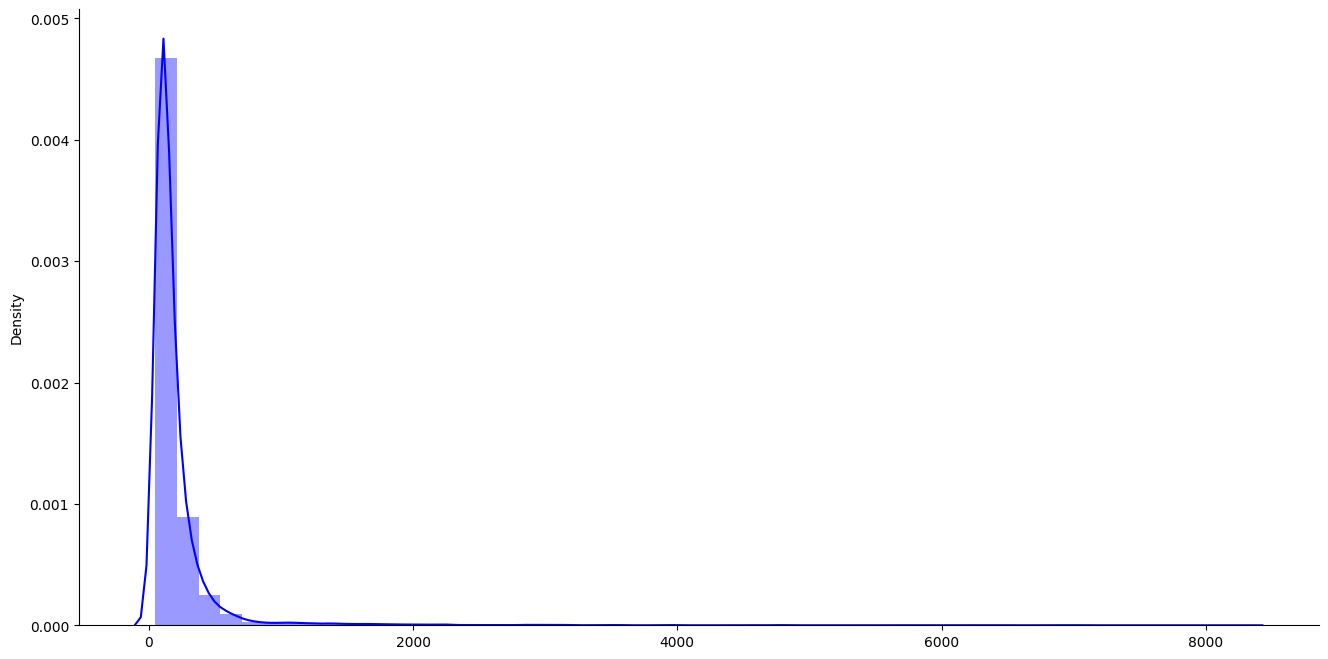

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='blue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
import numpy as np
print(f"A song is listened for an average of {np.mean(song_user)} users, with minimum {np.min(song_user)} and maximum {np.max(song_user)} users")


A song is listened for an average of 200.0 users, with minimum 48 and maximum 8277 users


In [ ]:
# Get how many songs each user have listened to
user_counts = song_df.groupby('user_id')['song_id'].count()

# Filter users which have listen to at least 16 songs
user_ten_id = user_counts[user_counts > 16].index.to_list()

In [ ]:
# Get how many user have listened to each song
song_counts = song_df.groupby('song_id')['user_id'].count()

# Get songs which have been listened at least 4 times
song_ten_id = song_counts[song_counts > 200].index.to_list()

In [ ]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_reduced = song_df[(song_df['user_id'].isin(user_ten_id)) & (song_df['song_id'].isin(song_ten_id))].reset_index(drop=True)

In [ ]:
df_song_reduced.shape


(950353, 7)

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]
df_song_reduced['listen_count'] = pd.cut(df_song_reduced['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [ ]:
listen_counts = pd.DataFrame(df_song_reduced.groupby('listen_count').size(), columns=['count']).reset_index(drop=False)


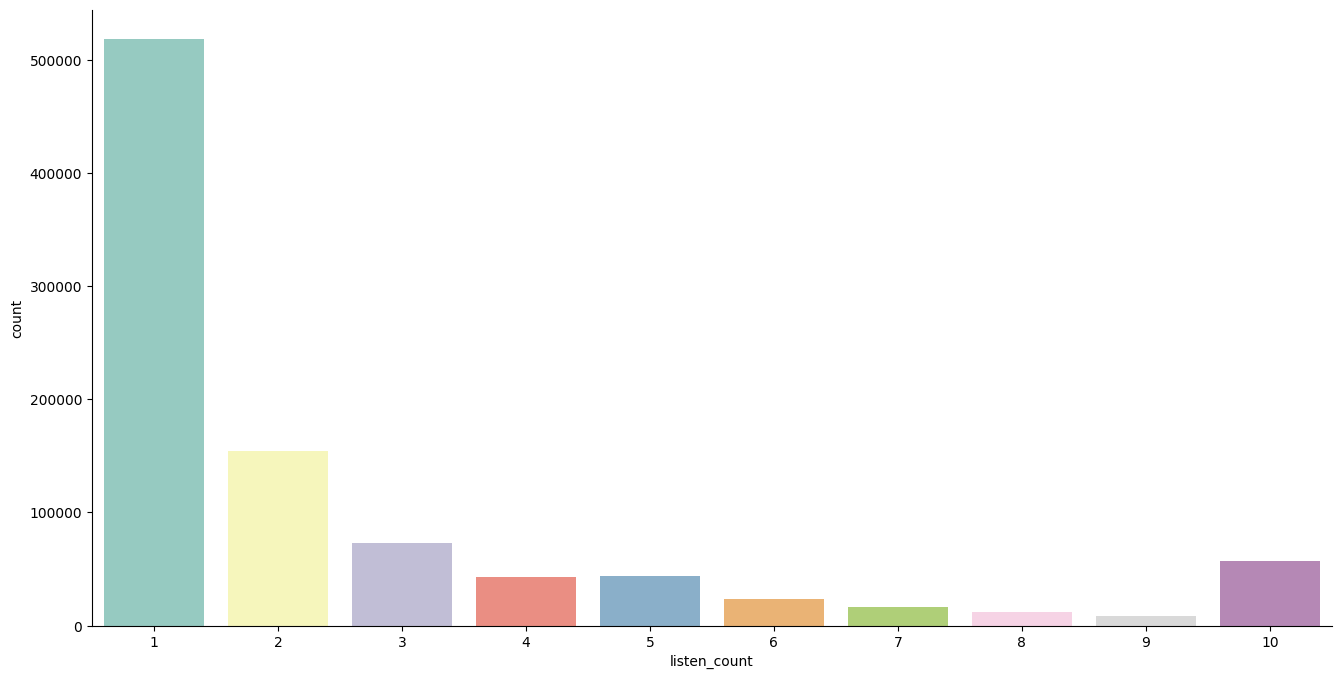

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();


In [ ]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_song_reduced[['user_id', 'song_id', 'listen_count']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)


In [ ]:
param_grid = {'n_factors': [160],
              'n_epochs': [100],
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [ ]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)

In [ ]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.1838
The RMSE is 2.183786305279678


In [ ]:
testset[0]

('1b8e8a2c4fe274651ced51fc35e2d69f76c87379', 'SOHNVHC12A6D4F95AB', 10.0)

In [ ]:
import numpy as np

In [ ]:
user_id = '00003a4459f33b92906be11abe0e93efc423c0ff'
# Get all the song ids in the dataset
all_song_ids = df_song_reduced['song_id'].unique()
# Remove the songs that the user has already listened to
songs_listened_by_user = df_song_reduced[df_song_reduced['user_id'] == user_id]['song_id'].unique()
song_ids_to_recommend = np.setdiff1d(all_song_ids, songs_listened_by_user)
# Make predictions for all the song ids to recommend
predictions = [final_algorithm.predict(user_id, song_id) for song_id in song_ids_to_recommend]
# Sort the predictions in descending order
predictions.sort(key=lambda x: x.est, reverse=True)
# Get the top 10 song ids with the highest predicted ratings
top_song_ids = [prediction.iid for prediction in predictions][:10]

In [ ]:
top_song_ids

['SOVMADB12A8C137B96',
 'SOAOSDF12A58A779F1',
 'SOEVQQZ12A6D4F968E',
 'SOMBGAL12AB0181F7F',
 'SOSJSSU12A6D4F8F41',
 'SOAUDET12A6D4F96B7',
 'SOULLOA12A6701FC56',
 'SOSNSKM12A8C1382A1',
 'SOFCPEE12A8C13D566',
 'SORMKFZ12A6D4F9395']

In [ ]:
recommended_songs = song_df[song_df['song_id'].isin(top_song_ids)]
recommended_song_names = list(set(recommended_songs['title'].tolist()))
print(recommended_song_names)

['Halo', 'Shadow Of The Day (Album Version)', 'Oh Very Young', 'STARSTRUKK [FEATURINGKATYPERRY] (Explicit Bonus Version)', 'Talk Show Host', 'Juke Box Hero (Remastered LP Version )', 'I Hate Everything About You', 'Hallelujah (Album Version)', 'Back Against The Wall']


In [ ]:
recommended_songs

,user_id,song_id,listen_count,title,release,artist_name,year
864,169f9f4c68b62d1887c7c0ac99d10a79cfca5daf,SOABJBU12A8C13F63F,1,Back Against The Wall,Cage The Elephant,Cage The Elephant,2008
1175,a58de017cbeda1763ea002fe027ed41b4ed53109,SOADJQJ12A8C141D38,3,Halo,Halo,Beyoncé,2008
1363,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,SOADJQJ12A8C141D38,3,Halo,Halo,Beyoncé,2008
1951,80aa05e1251892949df7c7b1f61b6ce8ffa27aec,SOAAVUV12AB0186646,1,STARSTRUKK [FEATURINGKATYPERRY] (Explicit Bonu...,WANT,3OH!3,2008
2645,ea07020bb223c733ccc55aa925ebcc25c4d97377,SOADJQJ12A8C141D38,4,Halo,Halo,Beyoncé,2008
...,...,...,...,...,...,...,...
1998463,1a8e700876bdab8669019bee20d193103f76ab92,SOADJQJ12A8C141D38,4,Halo,Halo,Beyoncé,2008
1998854,2601c4d316bd78af441377d82cdb2ff7918f6169,SOADJQJ12A8C141D38,1,Halo,Halo,Beyoncé,2008
1999043,b5e58978ddf76f40e4aaa83e5363d4f1671b911b,SOADISH12AB018DFAC,3,Talk Show Host,Blockbuster Movie Hits,Radiohead,1995
1999770,9116c65d75343f5ac19f27b2eb8b1b447855e2ba,SOADJQJ12A8C141D38,1,Halo,Halo,Beyoncé,2008


In [ ]:
df_song_reduced[df_song_reduced['user_id'] == user_id]

,user_id,song_id,listen_count,title,release,artist_name,year
81355,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
81356,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOAJAFJ12A58A7B75A,1,My Moon My Man,My Moon My Man,Feist,0
81357,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOAQTNT12A6701F957,1,That Was Just A Dream,Bright Like Neon Love,Cut Copy,2004
81358,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOBSLVH12A8C131F38,1,Island In The Sun,Maladroit,Weezer,2001
81359,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOCDOVE12AB01808DE,1,Handlebars (UK Radio Edit),Now That's What I Call Music! 71,Flobots,2008
81360,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOCNCGL127D9786D66,2,Lovefool,Best Of,The Cardigans,1996
81361,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOCVTLJ12A6310F0FD,1,Clocks,A Rush Of Blood To The Head,Coldplay,2002
81362,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SODVWOV12A6D4FB6D2,1,Bolinha De Papel,Live In Tokyo,João Gilberto,1962
81363,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOHNVHC12A6D4F95AB,10,Elephant Gun,The Gulag Orkestar,Beirut,2006
81364,1b8e8a2c4fe274651ced51fc35e2d69f76c87379,SOHPRQX12AB0186127,1,O.N.E,ODD BLOOD,Yeasayer,2010


In [ ]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1,biased=False)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.2072
The RMSE is 2.2071863140384473


In [ ]:
final_algorithm2 = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm2.fit(trainset)
test_predictions2 = final_algorithm2.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions2, verbose=True)}")

RMSE: 2.1852
The RMSE is 2.185172413649267


In [ ]:
user_id = 'ef8dd5dc4847803a2f5b26bf5984bd9cbac488a1'
# Get all the song ids in the dataset
all_song_ids = df_song_reduced['song_id'].unique()
# Remove the songs that the user has already listened to
songs_listened_by_user = df_song_reduced[df_song_reduced['user_id'] == user_id]['song_id'].unique()
song_ids_to_recommend = np.setdiff1d(all_song_ids, songs_listened_by_user)
# Make predictions for all the song ids to recommend
predictions = [final_algorithm2.predict(user_id, song_id) for song_id in song_ids_to_recommend]
# Sort the predictions in descending order
predictions.sort(key=lambda x: x.est, reverse=True)
# Get the top 10 song ids with the highest predicted ratings
top_song_ids = [prediction.iid for prediction in predictions][:10]

In [ ]:
recommended_songs = song_df[song_df['song_id'].isin(top_song_ids)]
recommended_song_names = list(set(recommended_songs['title'].tolist()))
print(recommended_song_names)

['Where I Stand', 'Eternal Flame (Single Version)', 'Together Again (Jimmy Jam Deep Remix)', 'Mony Mony (Downtown Mix)', 'The Stallion', "Someone Else's Arms", 'Soulful Dress', 'Man Makes The Zoo', 'Listen To Your Heart', 'Transparency']


In [ ]:
testset[:600]

[('e854be907fd9b0933fa9a5bec206783fc1e933ec', 'SOWCBKV12AC90732A6', 1.0),
 ('b6f5c424203db888d7bf7d1292c1d95287fa261a', 'SOOTKWZ12AB0181082', 1.0),
 ('8880d9a8c40e312d0da150b940e63c7860d00ec4', 'SOZAZZK12A6701F98D', 2.0),
 ('f08f045ab53f52fce3573780e61ec42247b4bdd7', 'SOABJBU12A8C13F63F', 10.0),
 ('dbb69538ffaab71522ff7e59d41b74e8929842ee', 'SOWEJXA12A6701C574', 3.0),
 ('d724f29ba8db45cd83d4f18011be180a37702a2a', 'SOMQWBH12A8AE44A40', 2.0),
 ('dbdcfb722f47252c4de676b6c69fd563a16cd6d2', 'SOALJBV12AB017FC3A', 1.0),
 ('ea1a73b9a9d07c9e59ae83c3de36bb014fa3e864', 'SOMNXML12A6D4F8386', 1.0),
 ('1470fff9ef6cbff219ba3f7f459f2ece4997fbad', 'SOBFRNE12A6D4F7995', 6.0),
 ('009fab78deabfd28481ce0123f5a9894c094d971', 'SOLLNTU12A6701CFDC', 3.0),
 ('656684e0c8cd25284cbc29715b3669fd33018d1d', 'SOUNJIO12AB0181339', 1.0),
 ('6b1a087b196f7244ceec2d759ec8b485fd8f1ef6', 'SOYCXUA12A8C133713', 1.0),
 ('49be1f63e7d1d303cf2be201d0e4a5a9ad9e44b1', 'SOGLWGG12A6D4F8046', 1.0),
 ('cc323d160d6e107af7c8de40095917600e

In [ ]:
!pip install --upgrade surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SGD

# Create and fit the SGD model
sgd = SGD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
sgd.fit(trainset)

# Make predictions on the test set
predictions = sgd.test(testset)

ImportError: ignored

In [ ]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [ ]:
# taking top 10k samples for quick results
song_df = song_df.head(10000)

In [ ]:
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [ ]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [ ]:
# create a pivot table
song_matrix = song_df.pivot_table(index='user_id', columns='title', values='listen_count', fill_value=0)

# convert to a sparse matrix
song_sparse = csr_matrix(song_matrix.values)


In [ ]:
import pandas as pd
songmetadata = pd.read_csv(r'E:\Analytics\song_data.csv')
othersongdata = pd.read_fwf(r'E:\Analytics\10000.txt’)
songmetadata = pd.DataFrame(songmetadata)
othersongdata.columns = ['user_id','song_id','listen_count’]
song_df = pd.merge(othersongdata, songmetadata.drop_duplicates(['song_id']), on="song_id“, how ="left“)
song_grouped = song_df.groupby(['title']).agg({"listen_count":"count"})
grouped_sum = song_grouped['listen_count'].sum()

#calculating the percent share of each song in listen count
song_grouped['percentage'] = song_grouped['listen_count'].div(grouped_sum)*100

#sorting the dataset with respect to listen count
song_grouped = song_grouped.sort_values(['listen_count'],ascending = True)
song_df = song_df['listen_count'].astype(float)
popular = song_grouped.sort_values(by = 'listen_count')

#filtering the top ten songs in the dataset
popularsongs = popular[9517:9567]
popularsongs = pd.DataFrame(popularsongs.reset_index())
popularsongs.sort_values('listen_count', ascending = False)
popularsongs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
